In [276]:
import pandas as pd
import numpy as np;
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

# Portanto, este conjunto de dados contém os seguintes recursos:

* **id:** É apenas o número de identificação da linha. Não é revelador
* **idade:** É a idade de uma pessoa em dias
* **gênero:** É o gênero da pessoa
* **altura:** É a altura da pessoa em cm
* **peso:** É o peso da pessoa em kg
* **ap_hi:** É a pressão arterial sistólica, ou seja, a pressão exercida quando o sangue é ejetado nas artérias. Valor normal: 120mmhg ou abaixo
* **ap_low:** É a pressão arterial diastólica, ou seja, pressão exercida quando o sangue é exercido entre as artérias e os batimentos cardíacos. Valor normal: 80mmhg ou abaixo
* **colesterol:** É o valor de colesterol (colesterol é um tipo de gordura encontrada no sangue) do seu sangue. Em adultos, 200 mg/dL é desejado com 200 e 239 mg/dL como Boderline High. Em crianças, 170 mg/dL é desejado com 170 e 199 mg/dL como Boderline High
* **gluc:** É o nível de glicose. Eles são inferiores a 100 mg/dL depois de não comer (jejum) por pelo menos 8 horas. E são inferiores a 140 mg/dL 2 horas depois de comer. Para a maioria das pessoas sem diabetes, os níveis de açúcar no sangue antes das refeições oscilam em torno de 70 a 80 mg/dL
* **fumaça:** Contém valores binários que indicam se a pessoa é fumante ou não, ou seja, {0: 'Não é fumante', 1: 'Fumante'}
* **alco:** Contém valores binários que indicam se a pessoa é alcoólatra ou não, ou seja, {0: 'Não é alcoólico', 1: 'Alcoólico'}
* **ativo:** Contém valores binários que indicam se a pessoa está envolvida em atividades físicas ou não, ou seja, {0: 'Não envolvido em atividades físicas', 1: 'envolvido em atividades físicas'}
* **cardio:** São nossos valores binários de valor alvo que indicam se a pessoa tem doenças cardiovasculares (DCV) ou não, ou seja, {0: 'Não tem DCV', 1: 'Tem DCV'}

In [277]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Às vezes, os valores ausentes não estão na forma de NaN
df = pd.read_csv('cardio_train.csv', delimiter = ';', na_values = missing_values)
print('Há um total de {} pontos de dados no conjunto de dados com {} recursos listados como {}:'.format(df.shape[0], df.shape[1], df.columns.values))

Há um total de 70000 pontos de dados no conjunto de dados com 13 recursos listados como ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']:


In [278]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [279]:
df.shape

(70000, 13)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [281]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [282]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [283]:
df.duplicated().sum()

0

In [284]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [285]:
df['id'].nunique()

70000

Vamos apagar a coluna "id", visto que não é relevante para a nossa análise

In [286]:
df.drop(['id'], axis=1, inplace=True)

A idade (age) está em dias, vamos converter para anos e considerar o número inteiro

In [287]:
df['age'] = df['age'].div(365).apply(lambda x: int(x))

In [288]:
# Renomear a coluna "age" para "age_years"
df.rename(columns={'age':'age_years'}, inplace=True)

BMI = mass (kg) \ (height)^2 (m)

In [289]:
# criar variavel BMI (Índice de massa corporal)
df['Bmi'] = round( df['weight'] / ((df['height'] / 100) ** 2) , 2)

In [290]:
# Criar variavel para categorizar pressão do sangue
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'Pré-hipertensão'
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Hipertensão Estágio 1'
    elif 140 <= ap_hi or ap_lo >= 90:
        return 'Hipertensão Estágio 2'
    elif ap_hi > 180 or ap_lo > 120:
        return 'Crise Hipertensiva'

df['blood_pressure_category'] = df.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)
df[['ap_hi', 'ap_lo', 'blood_pressure_category']].head(10)

,ap_hi,ap_lo,blood_pressure_category
0,110,80,Hipertensão Estágio 1
1,140,90,Hipertensão Estágio 2
2,130,70,Hipertensão Estágio 1
3,150,100,Hipertensão Estágio 2
4,100,60,Normal
5,120,80,Hipertensão Estágio 1
6,130,80,Hipertensão Estágio 1
7,130,90,Hipertensão Estágio 1
8,110,70,Normal
9,110,60,Normal


In [291]:
# Criar variavel para categorizar bmi
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Baixo peso'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Sobrepeso'
    elif 30 <= bmi < 35:
        return 'Classe de obesidade 1'
    elif 35<= bmi < 40:
        return 'Classe de obesidade 2'
    else:
        return 'Obesidade Extrema'

df['BMI_category'] = df['Bmi'].apply(categorize_bmi)

In [292]:
df.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Bmi,blood_pressure_category,BMI_category
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Hipertensão Estágio 1,Normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Hipertensão Estágio 2,Classe de obesidade 1
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Hipertensão Estágio 1,Normal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Hipertensão Estágio 2,Sobrepeso
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal,Normal


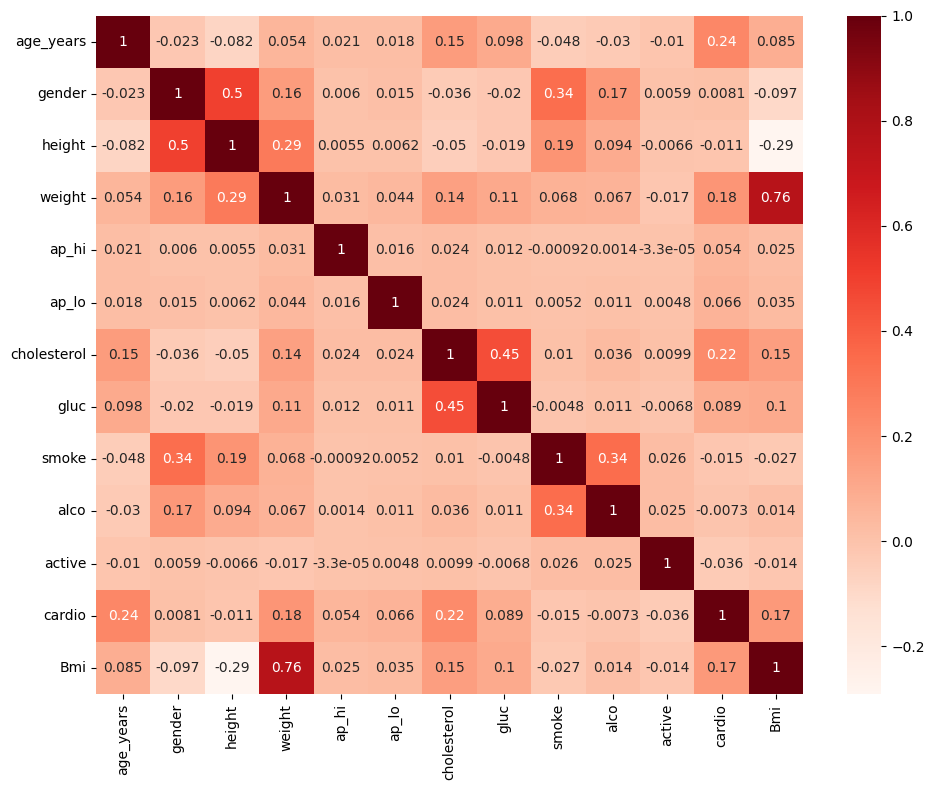

In [293]:
plt.figure(figsize=(10, 8))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.tight_layout()

In [294]:
#Risco de doença cardiovascular por idade
mean_cardio_by_age=df.groupby('age_years')['cardio'].mean()

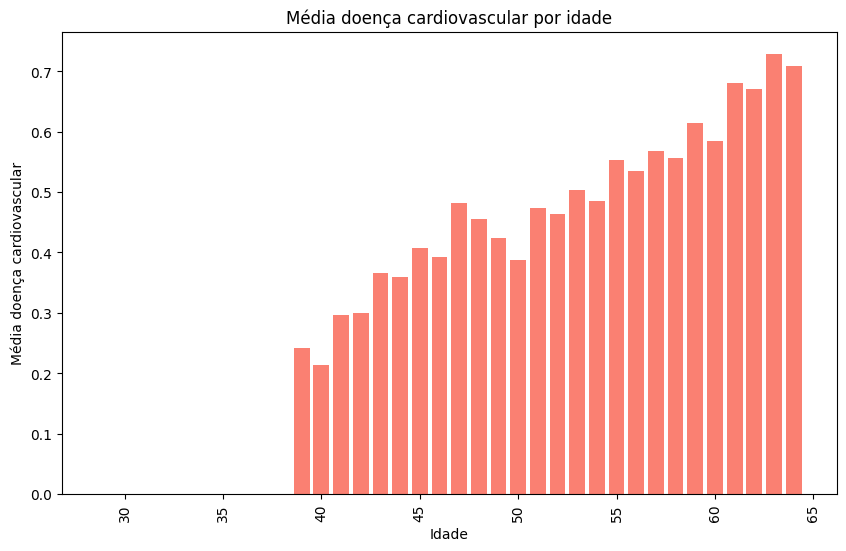

In [295]:
plt.figure(figsize=(10, 6))
plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values,color='salmon')
plt.xlabel('Idade')
plt.ylabel('Média doença cardiovascular')
plt.title('Média doença cardiovascular por idade')
plt.xticks(rotation=90)
plt.show()
plt.show()

In [296]:
gender_counts = df['gender'].value_counts()
gender_counts

,count
gender,
1,45530
2,24470


In [297]:
df['gender'].replace({1: 'Femenino', 2: 'Masculino'}, inplace=True)
df['cardio'].replace({0:'Sem doença', 1:'Com doença'}, inplace=True)

<ipython-input-297-462a002a9662>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-297-462a002a9662>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

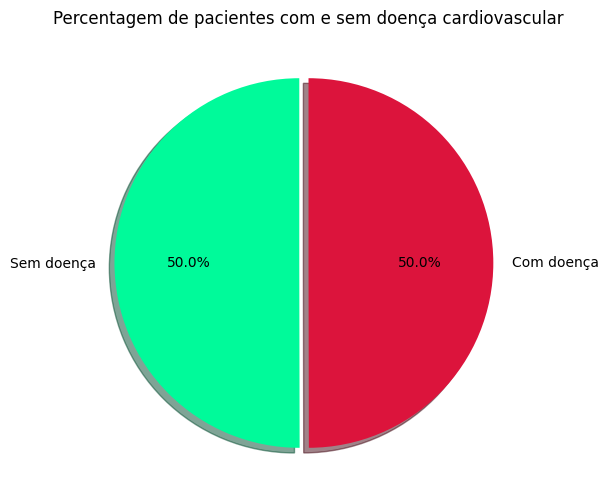

In [298]:
fig, ax = plt.subplots(figsize=(6, 6))


# Custom color palettes
cardio_colors = ['#00FA9A', '#DC143C']

# Pie chart for Cardio percentage
cardio_counts = df['cardio'].value_counts()
ax.pie(x=cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=cardio_colors, explode=(0.05, 0.0))
ax.set_title('Percentagem de pacientes com e sem doença cardiovascular')

plt.show()

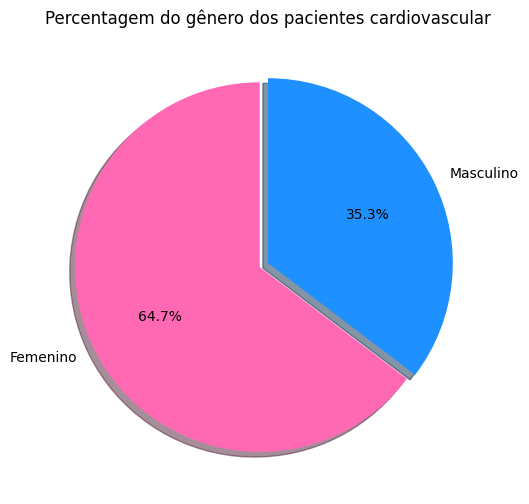

In [299]:
fig, ax = plt.subplots(figsize=(6, 6))

# Custom color palettes
gender_colors = ['#FF69B4', '#1E90FF']

# Pie chart for Cardiovascular patients gender percentage
gender_counts = df[df['cardio'] == 'Com doença']['gender'].value_counts()
ax.pie(x=gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=gender_colors, explode=(0.05, 0.0))
ax.set_title('Percentagem do gênero dos pacientes cardiovascular')

plt.show()

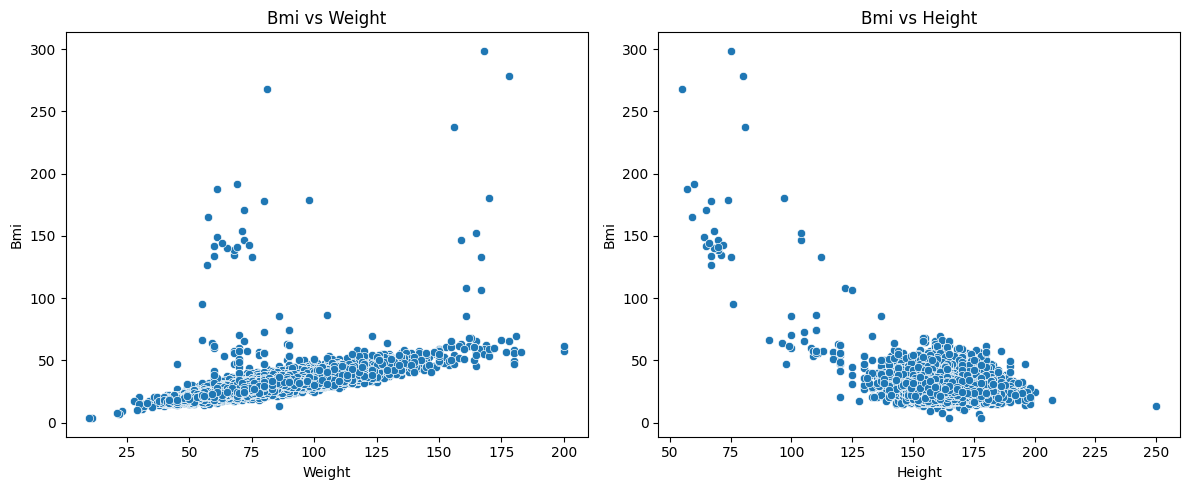

In [300]:
# Gráfico relação entre BMI com peso e altura
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='weight', y='Bmi', data=df)
plt.title('Bmi vs Weight')
plt.xlabel('Weight')
plt.ylabel('Bmi')
plt.subplot(1, 2, 2)
sns.scatterplot(x='height', y='Bmi', data=df)
plt.title('Bmi vs Height')
plt.xlabel('Height')
plt.ylabel('Bmi')


plt.tight_layout()
plt.show()

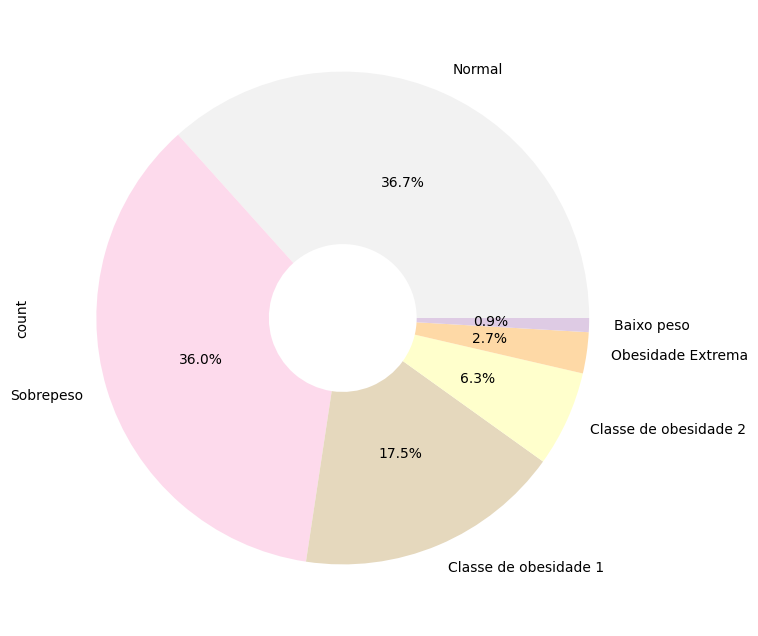

In [301]:
colors = plt.get_cmap('Pastel1_r').colors
df.BMI_category.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0,0,0,0,0,0), wedgeprops=dict(width=0.7));

In [302]:
df_grouped = df.groupby("blood_pressure_category")["BMI_category"].value_counts()
df_grouped

blood_pressure_category  BMI_category         
Hipertensão Estágio 1    Normal                   15320
                         Sobrepeso                14655
                         Classe de obesidade 1     6534
                         Classe de obesidade 2     2235
                         Obesidade Extrema          900
                         Baixo peso                 290
Hipertensão Estágio 2    Sobrepeso                 6288
                         Classe de obesidade 1     4235
                         Normal                    4102
                         Classe de obesidade 2     1786
                         Obesidade Extrema          852
                         Baixo peso                  70
Normal                   Normal                    4771
                         Sobrepeso                 3110
                         Classe de obesidade 1     1107
                         Classe de obesidade 2      276
                         Baixo peso                 255
                         Obesidade Extrema           89
Pré-hipertensão          Normal                    1463
                         Sobrepeso                 1122
                         Classe de obesidade 1      366
                         Classe de obesidade 2      100
                         Obesidade Extrema           45
                         Baixo peso                  29
Name: count, dtype: int64

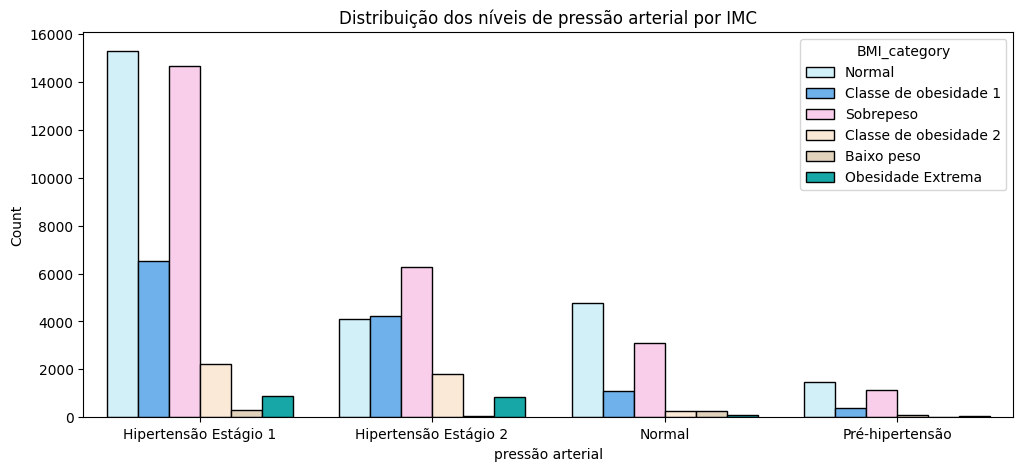

In [303]:
plt.figure(figsize=(12,5))
sns.countplot(x="blood_pressure_category", hue="BMI_category", data=df, palette=["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#E7D4B5","c"] , edgecolor="black"
)

plt.title("Distribuição dos níveis de pressão arterial por IMC")
plt.xlabel("pressão arterial")
plt.ylabel("Count")


plt.show()

In [304]:
df['cholesterol']=df['cholesterol'].replace({1: 'normal', 2: 'acima do normal', 3: 'Muito acima do normal' })

In [305]:
cholesterol_counts = df['cholesterol'].value_counts()
cholesterol_counts

,count
cholesterol,
normal,52385
acima do normal,9549
Muito acima do normal,8066


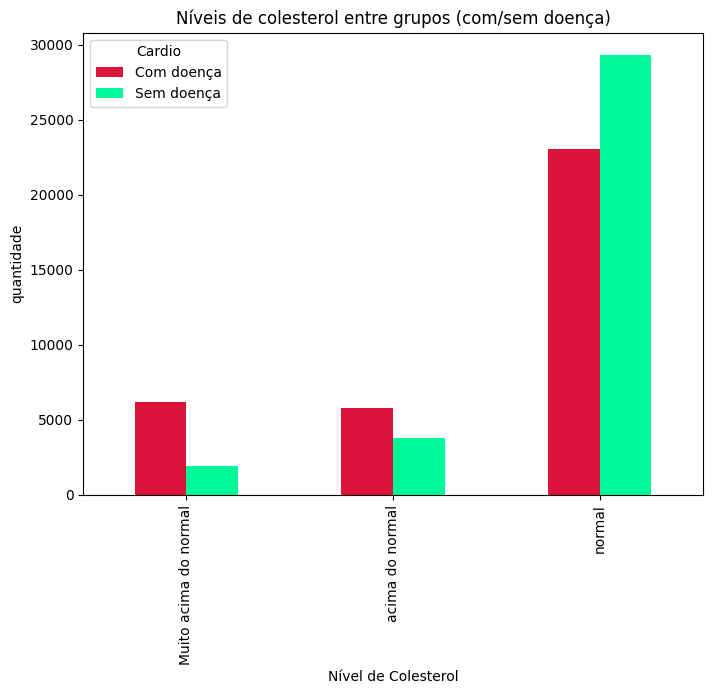

In [306]:
# Agrupando dados por 'colesterol' e 'cardio' e obtendo contagens
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Plotting using Seaborn
colors = ['#DC143C', '#00FA9A']
cross_tab = pd.crosstab(df['cholesterol'], df['cardio'])
cross_tab.plot(kind='bar', color=colors, figsize=(8, 6))
plt.title('Níveis de colesterol entre grupos (com/sem doença)')
plt.xlabel('Nível de Colesterol')
plt.ylabel('quantidade')
plt.legend(title='Cardio', labels=['Com doença', 'Sem doença'])

plt.show()

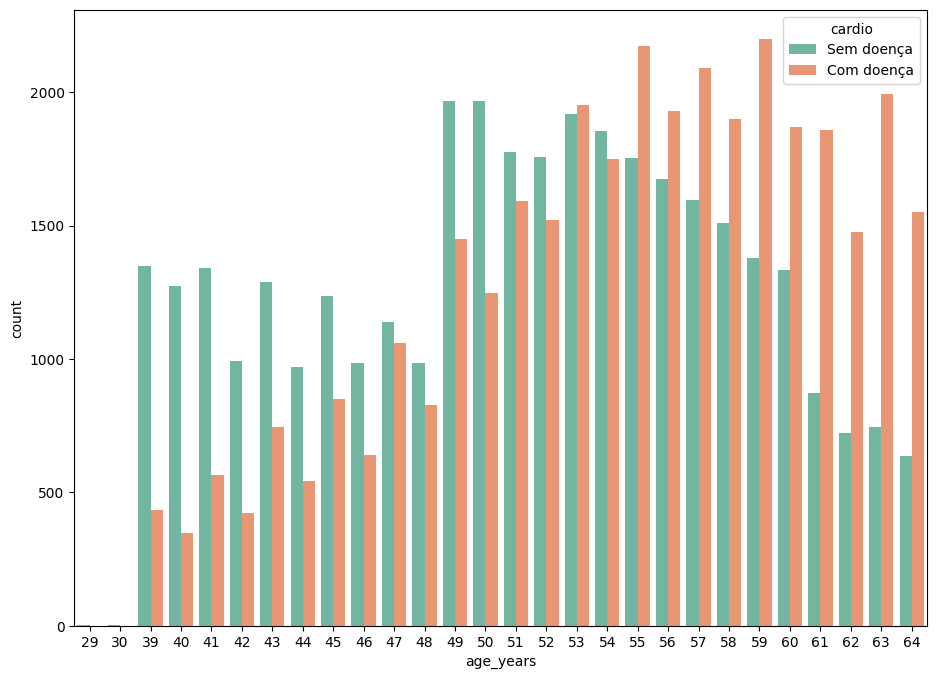

In [307]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age_years', hue='cardio', data = df, palette="Set2");

In [308]:
df['gluc']=df['gluc'].replace({1: 'normal', 2: 'Acima do normal', 3: 'Bem acima do normal' })

In [309]:
pd.crosstab(df.gluc,df.cardio)

cardio,Com doença,Sem doença
gluc,,
Acima do normal,3078,2112
Bem acima do normal,3316,2015
normal,28585,30894


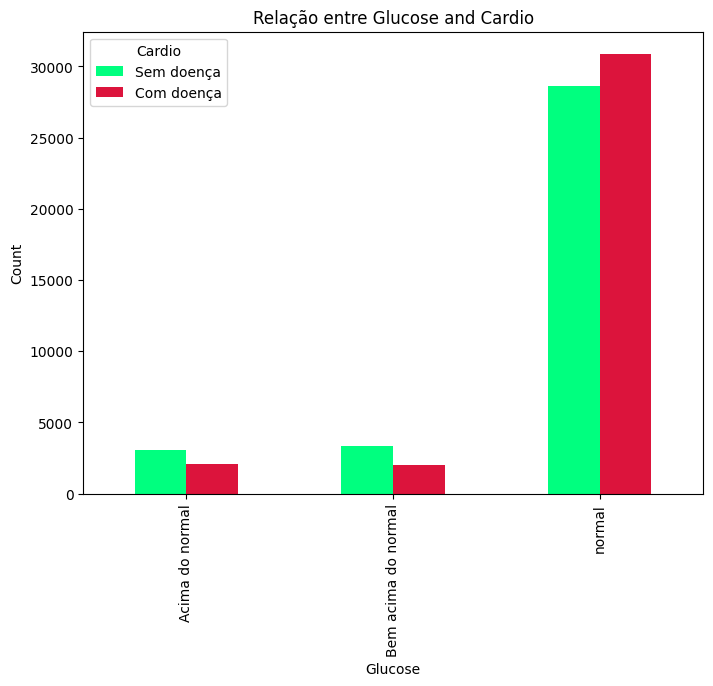

In [310]:
colors = ['#00FF7F', '#DC143C']
cross_tab = pd.crosstab(df['gluc'], df['cardio'])
cross_tab.plot(kind='bar', color=colors, figsize=(8, 6))
plt.title('Relação entre Glucose and Cardio')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['Sem doença', 'Com doença'])

plt.show()

In [311]:
df['active'] = df['active'].replace({0: 'Não Pratica atividades físicas', 1: 'Pratica atividades físicas'})

In [312]:
pd.crosstab(df.active,df.cardio)

cardio,Com doença,Sem doença
active,,
Não Pratica atividades físicas,7361,6378
Pratica atividades físicas,27618,28643


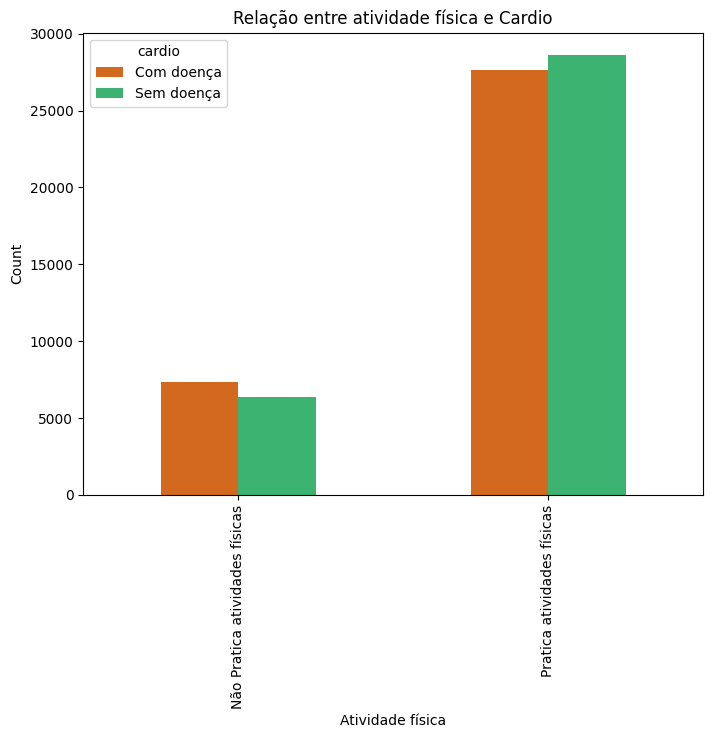

In [313]:
colors = ['#D2691E', '#3CB371']
cross_tab = pd.crosstab(df['active'], df['cardio'])
cross_tab.plot(kind='bar', color=colors, figsize=(8, 6))

plt.title('Relação entre atividade física e Cardio')
plt.xlabel('Atividade física')
plt.ylabel('Count')

plt.show()

In [314]:
df.smoke.replace([0,1] , ["Não Fumante" , "Fumante"] , inplace=True)
df['alco'].replace({0: "Não Consome", 1: "Consome"} , inplace=True )

<ipython-input-314-71028c19a7e2>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-314-71028c19a7e2>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

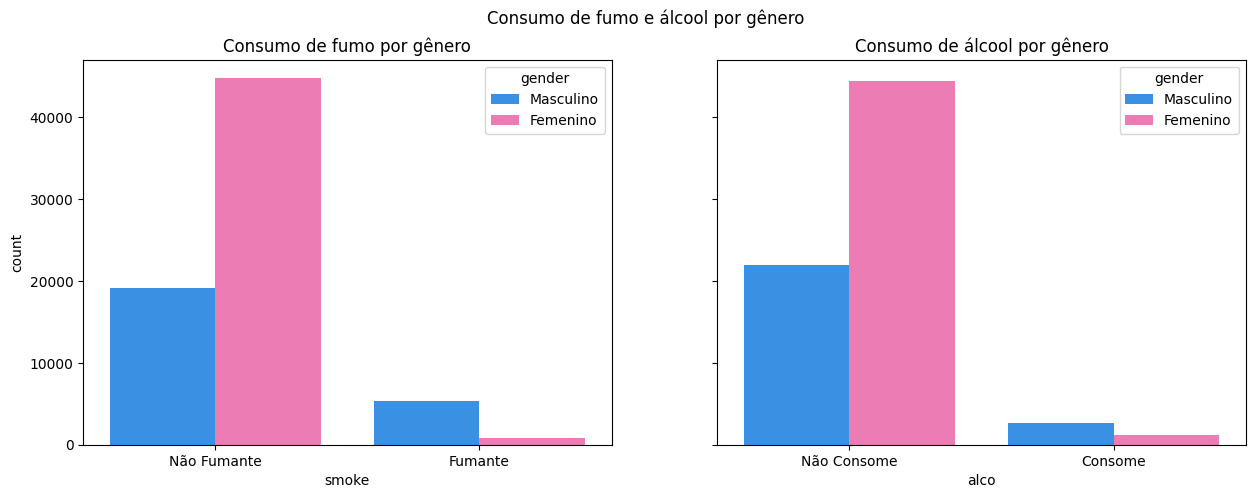

In [315]:
colors = ['#1E90FF', '#FF69B4']
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Consumo de fumo e álcool por gênero')

sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender,palette=colors)
axes[0].set_title("Consumo de fumo por gênero")


sns.countplot(ax=axes[1], x=df.alco,hue=df.gender,palette=colors)
axes[1].set_title("Consumo de álcool por gênero")
plt.show()

In [316]:
pd.crosstab(df.alco, df.cardio)

cardio,Com doença,Sem doença
alco,,
Consome,1823,1941
Não Consome,33156,33080


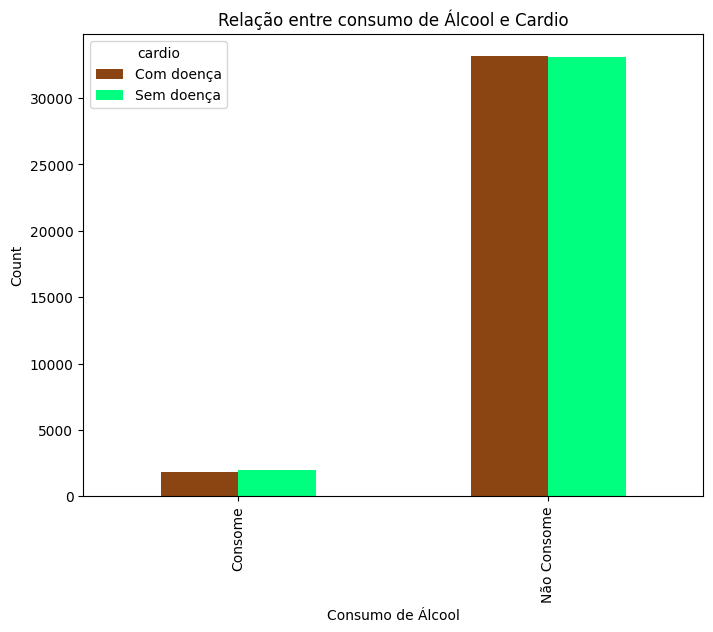

In [317]:
colors = ['#8B4513', '#00FF7F']
cross_tab = pd.crosstab(df['alco'], df['cardio'])
cross_tab.plot(kind='bar', color=colors, figsize=(8, 6))

plt.title('Relação entre consumo de Álcool e Cardio')
plt.xlabel('Consumo de Álcool')
plt.ylabel('Count')

plt.show()

In [318]:
pd.crosstab(df.smoke, df.cardio)

cardio,Com doença,Sem doença
smoke,,
Fumante,2929,3240
Não Fumante,32050,31781


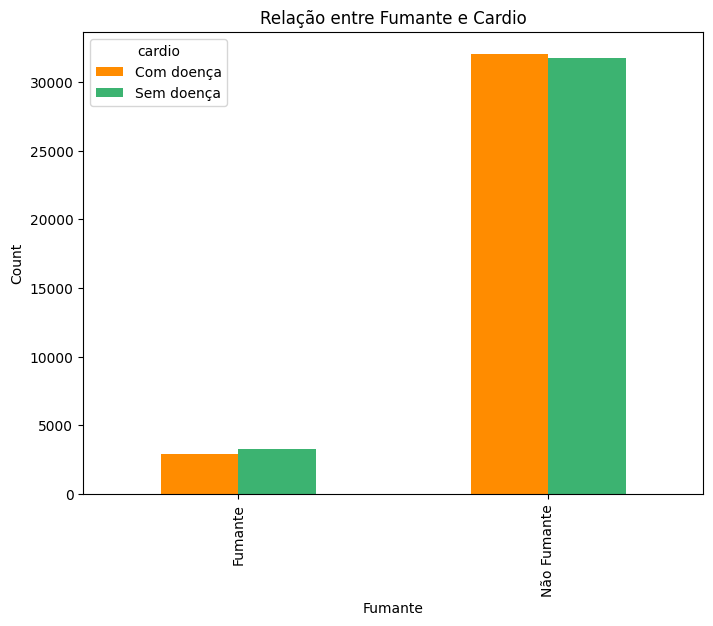

In [319]:
colors = ['#FF8C00', '#3CB371']
cross_tab = pd.crosstab(df['smoke'], df['cardio'])
cross_tab.plot(kind='bar', color=colors, figsize=(8, 6))

plt.title('Relação entre Fumante e Cardio')
plt.xlabel('Fumante')
plt.ylabel('Count')

plt.show()

In [320]:
df.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Bmi,blood_pressure_category,BMI_category
0,50,Masculino,168,62.0,110,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,21.97,Hipertensão Estágio 1,Normal
1,55,Femenino,156,85.0,140,90,Muito acima do normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Com doença,34.93,Hipertensão Estágio 2,Classe de obesidade 1
2,51,Femenino,165,64.0,130,70,Muito acima do normal,normal,Não Fumante,Não Consome,Não Pratica atividades físicas,Com doença,23.51,Hipertensão Estágio 1,Normal
3,48,Masculino,169,82.0,150,100,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Com doença,28.71,Hipertensão Estágio 2,Sobrepeso
4,47,Femenino,156,56.0,100,60,normal,normal,Não Fumante,Não Consome,Não Pratica atividades físicas,Sem doença,23.01,Normal,Normal


Acabamos de converter a idade de dias para ano.
Vamos ter certeza de que não criamos nenhuma duplicação

In [321]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Linhas duplicadas no conjunto de dados são : {}'.format(duplicate_sum))
else:
    print('O conjunto de dados não contém valores duplicados')

Linhas duplicadas no conjunto de dados são : 3208


Interessante! Acabamos de converter nossa idade de dias para anos e obtivemos uma grande quantidade de duplicações. Isso foi inesperado
Vamos dar uma olhada nas linhas duplicadas para obter mais informações sobre essa causa

In [322]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Bmi,blood_pressure_category,BMI_category
41915,52,Masculino,186,80.0,120,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,23.12,Hipertensão Estágio 1,Normal
48830,52,Masculino,186,80.0,120,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,23.12,Hipertensão Estágio 1,Normal
23200,57,Masculino,180,100.0,120,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,30.86,Hipertensão Estágio 1,Classe de obesidade 1
61467,57,Masculino,180,100.0,120,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,30.86,Hipertensão Estágio 1,Classe de obesidade 1
10389,40,Masculino,180,80.0,120,80,normal,normal,Não Fumante,Não Consome,Pratica atividades físicas,Sem doença,24.69,Hipertensão Estágio 1,Normal


OK. Para resolver esse problema, deixe-me dar um exemplo. Suponha que uma pessoa de 20 anos esteja comemorando seu aniversário em 7 de junho e agora seja maio.
Dividimos a idade por 365 para obter a idade em anos. Mantendo assim minha idade em 20 anos, ignorando o fato de que ele fará 21 anos em 30 dias.
A conversão da idade de dias para anos resulta na perda de dados importantes.
No momento, temos duas opções:

Mantendo a idade em dias
Eliminando linhas duplicadas (mantendo a idade no ano)
Para construir um modelo preditivo generalizado, é melhor eliminar essas linhas.
Pequenas alterações nos dias de idade de uma pessoa não devem ser levadas em consideração para determinar DCV, desde que tenhamos outras características que serão muito valiosas do que esta.

In [323]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total de {} pontos de dados restantes com {} recursos'.format(df.shape[0], df.shape[1]))

Total de 66792 pontos de dados restantes com 15 recursos


In [324]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>25]
print('Valores contínuos são : {}'.format(Continuous_features))

Valores contínuos são : ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'Bmi']


In [325]:
df[Continuous_features].head()

,age_years,height,weight,ap_hi,ap_lo,Bmi
0,50,168,62.0,110,80,21.97
1,55,156,85.0,140,90,34.93
2,51,165,64.0,130,70,23.51
3,48,169,82.0,150,100,28.71
4,47,156,56.0,100,60,23.01


In [326]:
df[Continuous_features].describe()

,age_years,height,weight,ap_hi,ap_lo,Bmi
count,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000,66792.000000
mean,52.859729,164.341748,74.521160,129.231585,97.446221,27.682571
std,6.803670,8.333904,14.580675,157.649354,192.906434,6.184334
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,3.470000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.880000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,26.570000
75%,58.000000,170.000000,83.000000,140.000000,90.000000,30.470000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,298.670000


As observações acima esclarecem alguns pontos-chave que podem deixar qualquer pessoa curiosa sobre este conjunto de dados:

A altura mínima e máxima parece estar com defeito. Embora o menor e o mais alto humano já conhecido tivessem 54,64 cm e 251,46 cm, respectivamente, mas aqui parece algum tipo de erro
As mesmas conclusões podem ser tiradas para o peso mínimo descrito aqui
A pressão arterial sistólica e a pressão arterial diastólica não podem ser negativas
Se a pressão arterial sistólica e a pressão arterial diastólica forem superiores a 180 e 120 mmHg, respectivamente, é um caso de emergência. Mas aqui estamos lidando com 16.020 mmHg e 11.000 mmHg respectivamente, o que parece bastante suspeito
Hum, então o que isso significa?
Ahh ! Eu vejo. Valores discrepantes

A altura mínima de 55 cm e máxima de 250 cm parecem ser anômalas e podem ser erros de entrada de dados. A altura típica de um adulto é entre 140 cm e 200 cm.

In [327]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['height'], name = 'Altura', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['weight'], name = 'Peso', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot para Peso e Altura com outliers")
fig.show()


In [328]:
print('Total de {} pontos de dados restantes com {} recursos'.format(df.shape[0], df.shape[1]))

Total de 66792 pontos de dados restantes com 15 recursos


vamos assumir que Altura mínimo: 140 cm e máximo: 250 cm. Alturas muito fora desse intervalo são raras e provavelmente são erros de entrada.

In [329]:
print('De acordo com nossas suposições, temos {} outliers totais'.format(len(df[(df["height"]<100)])))

De acordo com nossas suposições, temos 29 outliers totais


In [330]:
# vamos remover do nosso dataset altura abaixo de 140 cm
df = df[(df["height"]>=100)]

In [331]:
print('Total de {} pontos de dados restantes com {} recursos'.format(df.shape[0], df.shape[1]))

Total de 66763 pontos de dados restantes com 15 recursos


 vamos assumir que o Peso mínimo para adulto é: 30 kg e máximo: 200 kg. Pesos fora desse intervalo são raros para adultos e podem ser erros de entrada.

In [332]:
print('De acordo com nossas suposições, temos {} outliers totais'.format(len(df[(df["weight"]<30)])))

De acordo com nossas suposições, temos 7 outliers totais


In [333]:
#vamos eliminar do nosso dataset peso abaixo dos 30kg
df = df[(df["weight"]>=30)]

In [334]:
print('Total de {} pontos de dados restantes com {} recursos'.format(df.shape[0], df.shape[1]))

Total de 66756 pontos de dados restantes com 15 recursos


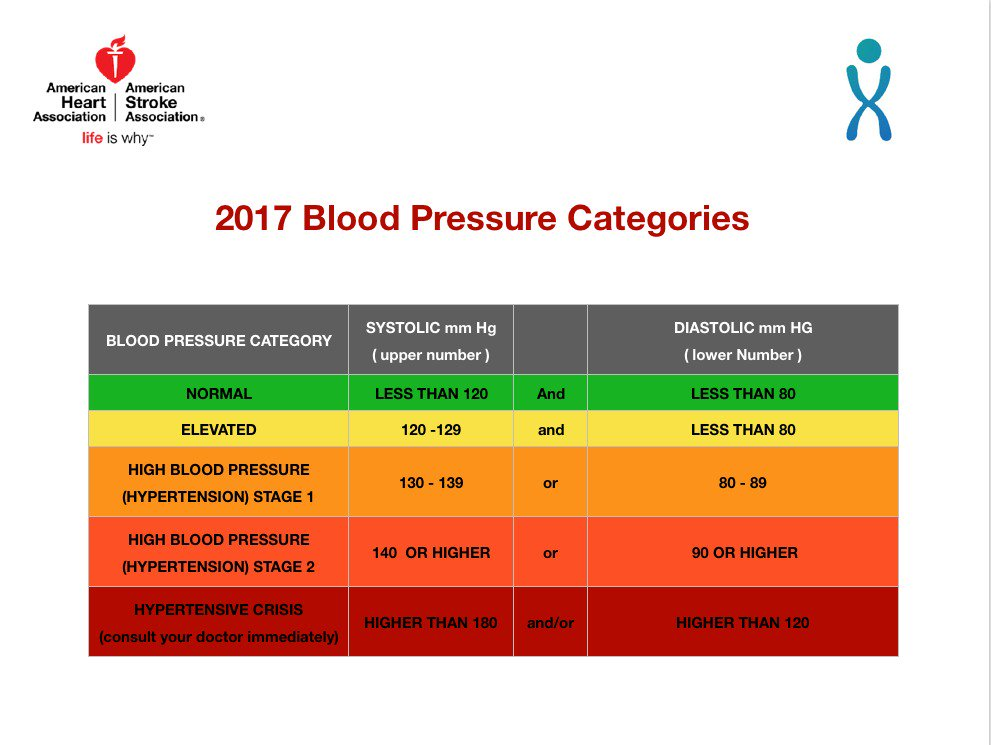

In [335]:
# Exibir a imagem
Image('/content/imagem_pressão.jpeg')

Conforme pesquisamos, subtrair a pressão arterial diastólica da pressão arterial sistólica dá uma pressão de pulso que não pode ser negativa
Portanto, ap_hi > ap_lo

In [336]:
print('Há um total de {} observações onde ap_hi < ap_lo'.format(len(df[df['ap_hi'] < df['ap_lo']])))
print('Total de observações preservadas : {}'.format(len(df)))

Há um total de 1229 observações onde ap_hi < ap_lo
Total de observações preservadas : 66756


vamos remover dados onde pressão alta é menor que a pressão baixa. Porque é impossível pressão baixa ser maior que a pressão alta

In [337]:
df = df[df['ap_hi'] >= df['ap_lo']].reset_index(drop=True)
print('Total de observações preservadas : {}'.format(len(df)))

Total de observações preservadas : 65527


Mínimo: 80 mmHg
Máximo: 220 mmHg
Justificativa: Valores fora desse intervalo são raros e podem ser erros de entrada. Pressão arterial sistólica normalmente varia entre 90 e 180 mmHg, mas é possível considerar um intervalo um pouco maior.

In [338]:
print('De acordo com nossas suposições, temos {} outliers totais'.format(len(df[(df["ap_hi"]>300) | (df["ap_hi"]<60)])))

De acordo com nossas suposições, temos 45 outliers totais


In [339]:
df = df[(df["ap_hi"]<=300) & (df["ap_hi"]>=60)]
print('Total de observações preservadas : {}'.format(len(df)))

Total de observações preservadas : 65482


Mínimo: 40 mmHg
Máximo: 130 mmHg
Justificativa: Valores fora desse intervalo são raros e podem ser erros de entrada. A pressão diastólica normalmente varia entre 60 e 120 mmHg, mas é possível considerar um intervalo um pouco maior.

In [340]:
print('De acordo com nossas suposições, temos {} outliers totais'.format(len(df[(df["ap_lo"]>200) | (df["ap_lo"]<30)])))

De acordo com nossas suposições, temos 40 outliers totais


In [341]:
df = df[(df["ap_lo"]<=200) & (df["ap_lo"]>=30)]
print('Total de observações preservadas : {}'.format(len(df)))

Total de observações preservadas : 65442


In [342]:
print('Total de {} pontos de dados restantes com {} recursos'.format(df.shape[0], df.shape[1]))

Total de 65442 pontos de dados restantes com 15 recursos


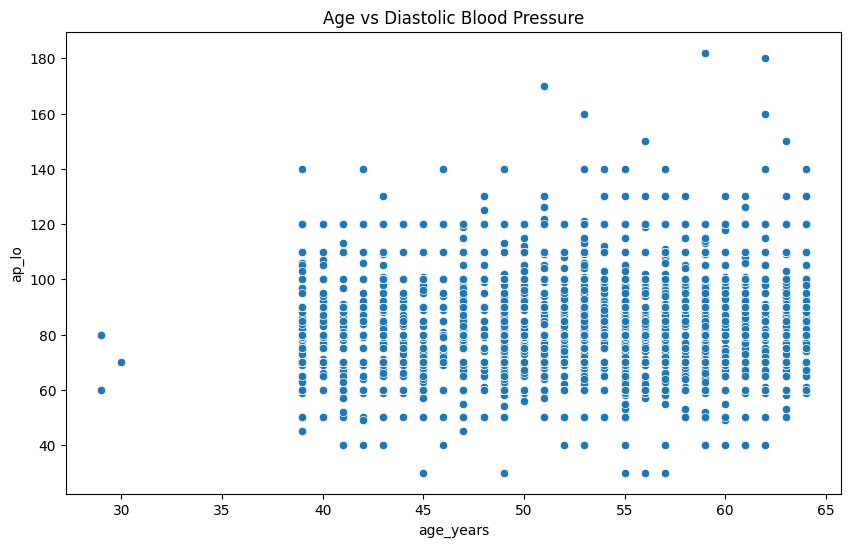

In [343]:
# Gráfico de dispersão de idade vs pressão arterial diastólica (ap_lo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='ap_lo', data=df).set(title='Age vs Diastolic Blood Pressure')
plt.show()

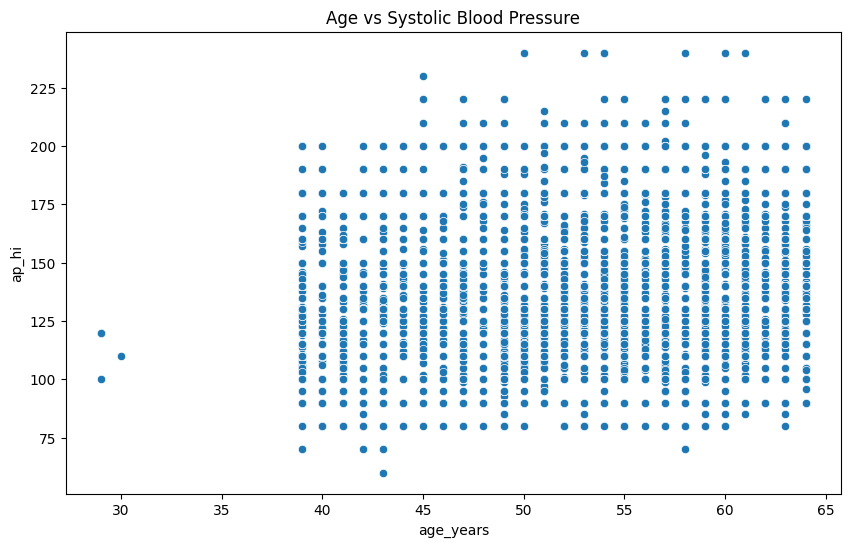

In [344]:
# Gráfico de dispersão de idade vs pressão arterial diastólica (ap_lo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='ap_hi', data=df).set(title='Age vs Systolic Blood Pressure')
plt.show()

In [345]:
df.describe()

,age_years,height,weight,ap_hi,ap_lo,Bmi
count,65442.000000,65442.000000,65442.000000,65442.000000,65442.000000,65442.000000
mean,52.848110,164.380138,74.438830,126.990022,81.385227,27.598029
std,6.806716,8.102313,14.495503,16.997212,9.656418,5.423312
min,29.000000,100.000000,30.000000,60.000000,30.000000,10.730000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.880000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,26.560000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.440000
max,64.000000,250.000000,200.000000,240.000000,182.000000,152.550000


como podemos ver já não temos outliers ou  valores discrepantes

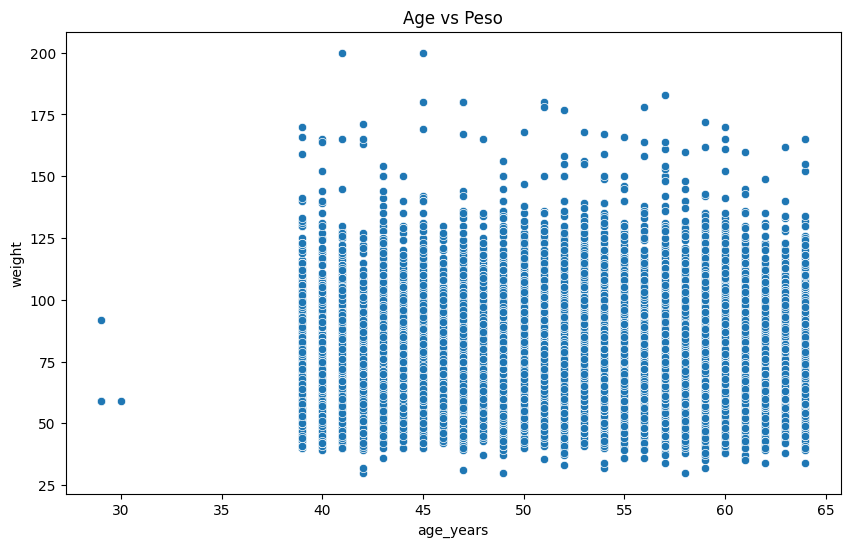

In [346]:
# Gráfico de dispersão de idade vs pressão arterial diastólica (ap_lo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='weight', data=df).set(title='Age vs Peso')
plt.show()

In [347]:
#guardar o dataset limpo
df.to_csv('cardio_train_clean.csv', index=False)

**Label Encoding** é adequado para variáveis categóricas ordinais, onde existe uma ordem natural nas categorias.

**One-Hot Encoding** é geralmente preferido para variáveis categóricas nominais, onde não há ordem intrínseca

In [348]:
# Lista de colunas categóricas a serem convertidas
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'blood_pressure_category', 'BMI_category']

# Aplicar LabelEncoder a cada coluna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


print(df.head())

   age_years  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0         50       1     168    62.0    110     80            2     2      1   
1         55       0     156    85.0    140     90            0     2      1   
2         51       0     165    64.0    130     70            0     2      1   
3         48       1     169    82.0    150    100            2     2      1   
4         47       0     156    56.0    100     60            2     2      1   

   alco  active  cardio    Bmi  blood_pressure_category  BMI_category  
0     1       1       1  21.97                        0             3  
1     1       1       0  34.93                        1             1  
2     1       0       0  23.51                        0             3  
3     1       1       0  28.71                        1             5  
4     1       0       1  23.01                        2             3  


In [349]:
#Separar as variáveis independentes (features) da variável dependente (target)
X = df.drop('cardio', axis=1)  # Features
y = df['cardio']  # Target

In [350]:
#dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de treinamento: (52353, 14)
Tamanho do conjunto de teste: (13089, 14)


In [351]:
# Aplicando SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [352]:
#Normalizar ou padronizar os dados numéricos usando StandardScaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [353]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculando a matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    return accuracy, precision, recall, f1, fn

# Modelos a serem avaliados
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(random_state=42, max_iter=300)
}

# Dicionário para armazenar as métricas
metrics = {}

# Avaliar cada modelo
for model_name, model in models.items():
    accuracy, precision, recall, f1, fn = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "False Negatives": fn
    }

# Exibir as métricas para cada modelo
for model_name, metric in metrics.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metric['Accuracy']:.4f}")
    print(f"  Precision: {metric['Precision']:.4f}")
    print(f"  Recall: {metric['Recall']:.4f}")
    print(f"  F1-Score: {metric['F1-Score']:.4f}")
    print(f"  False Negatives: {metric['False Negatives']}")
    print()

# Identificar o modelo com o maior F1-Score
best_model = max(metrics, key=lambda k: metrics[k]["F1-Score"])
print(f"Melhor modelo (maior F1-Score): {best_model}")
print(f"  F1-Score: {metrics[best_model]['F1-Score']:.4f}")
print(f"  Recall: {metrics[best_model]['Recall']:.4f}")
print(f"  Precision: {metrics[best_model]['Precision']:.4f}")
print(f"  False Negatives: {metrics[best_model]['False Negatives']}")

[LightGBM] [Info] Number of positive: 26489, number of negative: 26489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 52978, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Logistic Regression:
  Accuracy: 0.7251
  Precision: 0.6952
  Recall: 0.7799
  F1-Score: 0.7351
  False Negatives: 1409

Random Forest:
  Accuracy: 0.6985
  Precision: 0.6900
  Recall: 0.6965
  F1-Score: 0.6932
  False Negatives: 1943

SVM:
  Accuracy: 0.7315
  Precision: 0.7023
  Recall: 0.7825
  F1-Score: 0.7403
  False Negatives: 1392

Gradient Boosting:
  Accuracy: 0.7340
  Precision: 0.7124
  Recall: 0.7647
  F1-Score: 0.7376
  False Negatives: 1506

KNN:
  Accuracy: 0.6920
  Precision: 0

RandomizedSearchCV para otimizar o modelo de Gradient Boosting

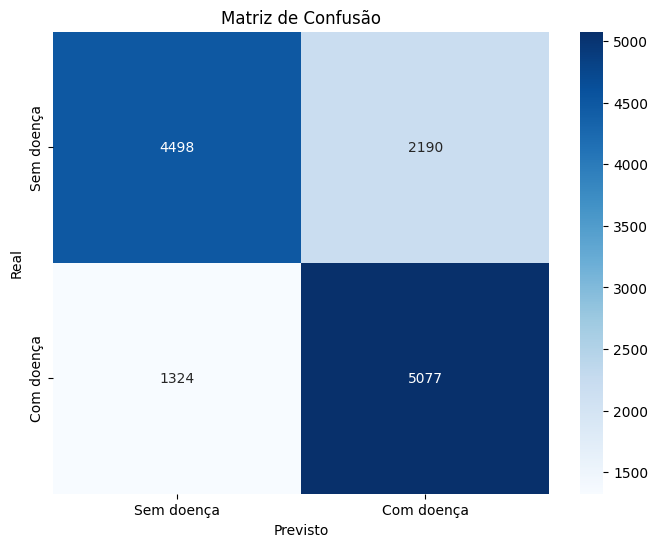

In [358]:
# Utilizando o melhor modelo já treinado
best_model = models["MLPClassifier"]

# Fazendo previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem doença', 'Com doença'], yticklabels=['Sem doença', 'Com doença'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

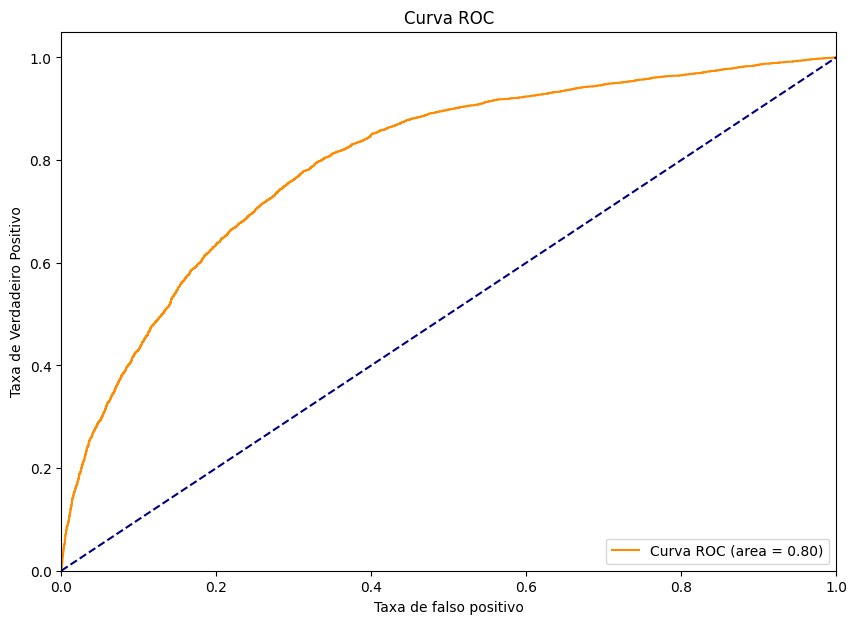

AUC: 0.80


In [363]:
# Utilizando o melhor modelo já treinado
best_model = models["MLPClassifier"]

# Obtendo as probabilidades de previsão para a classe positiva
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plotando a curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibindo a AUC
print(f"AUC: {auc:.2f}")

In [356]:
# Caminho onde o modelo será salvo
model_filename = 'best_model.pkl'

# Salvando o modelo
joblib.dump(best_model, model_filename)

print(f"Modelo salvo como {model_filename}")

# Salvar o scaler
joblib.dump(scaler, 'scaler.pkl')

print("Scaler salvo como scaler.pkl")

Modelo salvo como best_model.pkl
Scaler salvo como scaler.pkl


In [378]:
# Carregar o scaler e o modelo
scaler = joblib.load('scaler.pkl')
model = joblib.load('best_model.pkl')

# Dados fornecidos
dados_teste = {
    'age_years': 49,
    'gender': 'Femenino',
    'height': 150,
    'weight': 70.0,
    'ap_hi': 80,
    'ap_lo': 76,
    'cholesterol': 'normal',
    'gluc': 'normal',
    'smoke': 'Não Fumante',
    'alco': 'Não Consome',
    'active': 'Pratica atividades físicas',
    'Bmi': 20.23,
    'blood_pressure_category': 'Normal',
    'BMI_category': 'Normal'
}

# Transformando os dados categóricos usando o LabelEncoder treinado
dados_teste_encoded = [
    dados_teste['age_years'],
    label_encoders['gender'].transform([dados_teste['gender']])[0],
    dados_teste['height'],
    dados_teste['weight'],
    dados_teste['ap_hi'],
    dados_teste['ap_lo'],
    label_encoders['cholesterol'].transform([dados_teste['cholesterol']])[0],
    label_encoders['gluc'].transform([dados_teste['gluc']])[0],
    label_encoders['smoke'].transform([dados_teste['smoke']])[0],
    label_encoders['alco'].transform([dados_teste['alco']])[0],
    label_encoders['active'].transform([dados_teste['active']])[0],
    dados_teste['Bmi'],
    label_encoders['blood_pressure_category'].transform([dados_teste['blood_pressure_category']])[0],
    label_encoders['BMI_category'].transform([dados_teste['BMI_category']])[0]
]

# Normalizando os dados usando o scaler treinado
dados_teste_scaled = scaler.transform([dados_teste_encoded])

# Fazendo a previsão com o modelo SVM
prediction = model.predict(dados_teste_scaled)

# Interpretando a previsão
if prediction[0] == 1:
    print("Predição: Possui doença cardiovascular")
else:
    print("Predição: Não possui doença cardiovascular")

Predição: Possui doença cardiovascular


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

